In [315]:
data = '''.................................
.....###.#......###.#......###.#.
.###.##..#..###.##..#..###.##..#.
..#.#...#....#.#...#....#.#...#..
....#.#........#.#........#.#....
.##...####..##..S####..##...####.
.##..#...#..##..#...#..##..#...#.
.......##.........##.........##..
.##.#.####..##.#.####..##.#.####.
.##..##.##..##..##.##..##..##.##.
.................................'''

In [2]:
import numpy as np
from scipy import ndimage
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation
import math
from scipy.interpolate import lagrange

In [3]:
from aocd import get_data
data = get_data(day=21, year=2023)

In [4]:
grid = np.array([ list(l) for l in data.split('\n') ])
walls = np.where(grid == '#', 0, 1)
board = np.where(grid == 'S', 1, 0)
structure = [[0,1,0], [1,1,1], [0,1,0]]

In [5]:
last = board
for i in range(10):
    next = ndimage.binary_dilation(last, mask=walls, structure=structure, iterations=1).astype(int)
    last = next - last
last.sum()

110

In [9]:
def dialate_expand(grid, walls, times=1):
    ng = np.copy(grid)
    ng = np.pad(ng, ng.shape*np.c_[times//20], mode='constant', constant_values=0).astype(int)
    walls = np.pad(walls, walls.shape*np.c_[times//20], mode='wrap').astype(int)
    assert ng.shape == walls.shape
    for _ in range(times):
        ng = ndimage.binary_dilation(ng, mask=walls, structure=structure, iterations=1).astype(int) - ng
    return ng.sum()

In [10]:
H = grid.shape[0]
xs = [65, 65 + H, 65 + 2 * H]
ys = [ dialate_expand(board, walls, i) for i in xs ]

In [11]:
round(lagrange(xs, ys)(26501365))

637087163925555

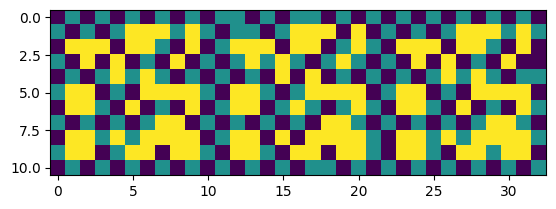

In [275]:
last = board

fig, ax = plt.subplots()

img = ax.imshow(last, interpolation='none', animated=True)

ims = []#[[img]]
#im = plt.imshow(last , interpolation='none', animated=True)

for i in range(50):
    last = binary_dilation_wrapped(last) - last
    img = ax.imshow(last + np.where(walls,0,2), interpolation='none', animated=True)
    ims.append([img])

ani = matplotlib.animation.ArtistAnimation(fig, ims, interval=800, blit=True, repeat_delay=1000)
#ani.save("walk.gif", writer='imagemagick',fps=5)
from IPython.display import HTML
HTML(ani.to_jshtml())